#  Description of data
## Import the required packages

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

## Set the plot style

In [3]:
sns.set(style='ticks')
plt.rcParams['font.family']='Arial Unicode MS'
plt.rcParams['axes.unicode_minus']=False
warnings.filterwarnings('ignore')

## Import the data
---
***Description of each column***



**age**: age in years

**sex**: sex (1 = male; 0 = female)

**cp**: chest pain type

    Value 1: typical angina

    Value 2: atypical angina

    Value 3: non-anginal pain

    Value 4: asymptomatic

**trestbps**: resting blood pressure (in mm Hg on admission to the hospital)

**chol**: serum cholestoral in mg/dl

**fbs**: fasting blood sugar > 120 mg/dl

**restecg**: resting electrocardiographic results

    Value 0: normal

    Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)

    Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

**thalach**: maximum heart rate achieved

**exang**: exercise induced angina (1 = yes; 0 = no)

**oldpeak** = ST depression induced by exercise relative to rest

**slope**: the slope of the peak exercise ST segment

    Value 1: upsloping

    Value 2: flat

    Value 3: downsloping

**ca**: number of major vessels (0-3) colored by flourosopy

**thal**: 3 = normal; 6 = fixed defect; 7 = reversable defect



In [54]:
df = pd.read_csv("./heart.csv",)
print(df.shape)
df.head()

(303, 14)


age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1

In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


## Analysis of data
### The relationship between disease and gender

In [56]:
df1 = df.copy()
countNoDisease = len(df1[df1.target == 0])
countHaveDisease = len(df1[df1.target == 1])
countfemale = len(df1[df1.sex == 0])
countmale = len(df1[df1.sex == 1])
print(f'No Disease:{countNoDisease }',end=' ,')
print("Percentate of No Disease: {:.2f}%".format((countNoDisease / (len(df1.target))*100)))
print(f'Have Disease:{countHaveDisease }',end=' ,')
print("Percentate of Have Disease: {:.2f}%".format((countHaveDisease / (len(df1.target))*100)))
print(f'The number of women: {countfemale }',end=' ,')
print("The proportion of women: {:.2f}%".format((countfemale / (len(df1.sex))*100)))
print(f'The number of men: {countmale }',end=' ,')
print("The proportion of male: {:.2f}%".format((countmale   / (len(df1.sex))*100)))

No Disease:138 ,Percentate of No Disease: 45.54%
Have Disease:165 ,Percentate of Have Disease: 54.46%
The number of women: 96 ,The proportion of women: 31.68%
The number of men: 207 ,The proportion of male: 68.32%


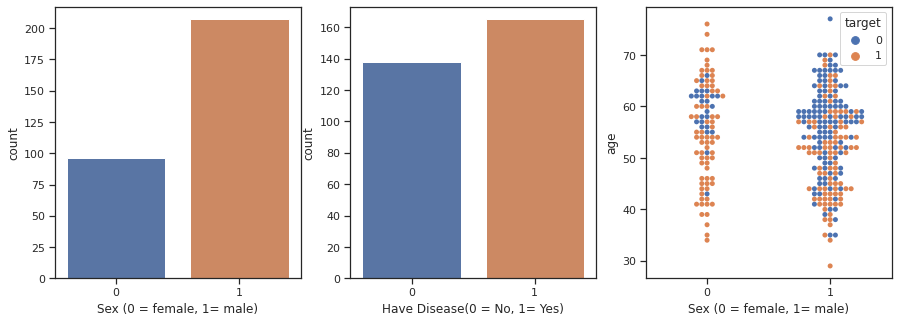

In [34]:
fig, ax =plt.subplots(1,3)  #2 subploat
fig.set_size_inches(w=15,h=5)   # set the size of cavance
sns.countplot(x="sex", data=df1,ax=ax[0])
ax[0].set_xlabel("Sex (0 = female, 1= male)")
sns.countplot(x="target", data=df1,ax=ax[1])
ax[1].set_xlabel("Have Disease(0 = No, 1= Yes)")
sns.swarmplot(x='sex',y='age',hue='target',data=df1,ax=ax[2])
ax[2].set_xlabel("Sex (0 = female, 1= male)")
plt.show()

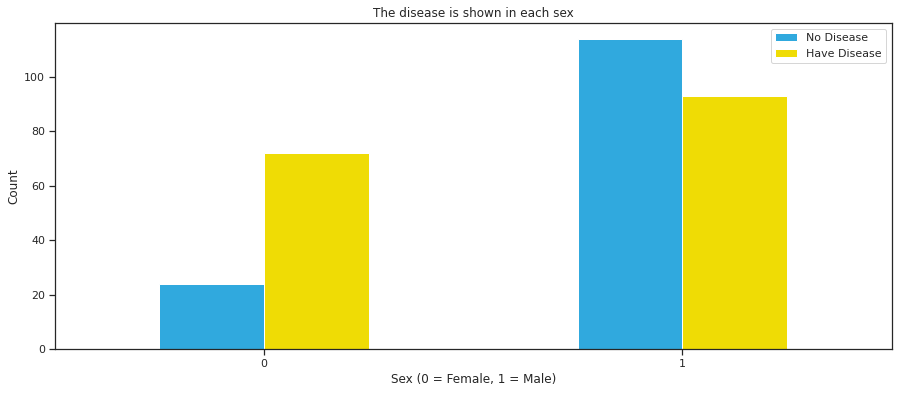

In [35]:
pd.crosstab(df1.sex,df1.target).plot(kind="bar",figsize=(15,6),color=['#30A9DE','#EFDC05' ])
plt.title('The disease is shown in each sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["No Disease", "Have Disease"])
plt.ylabel('Count')
plt.show()

### The relationship between disease and age

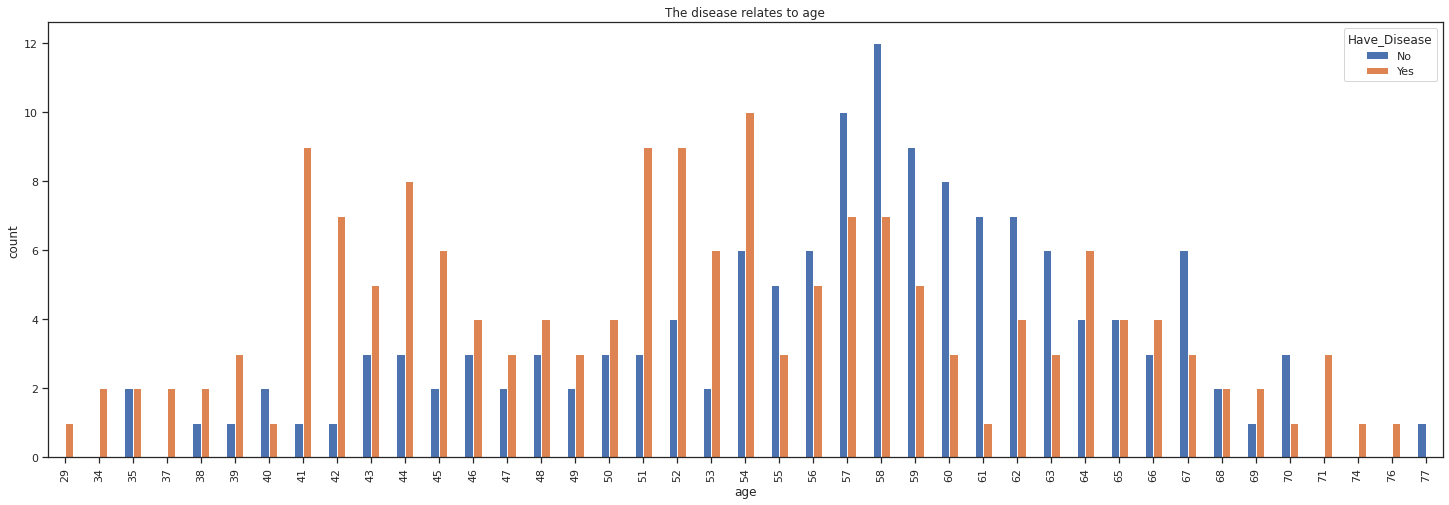

In [58]:
df1.rename(columns ={'target':'Have_Disease'}, inplace = True)
df1['Have_Disease'].replace({1:'Yes',0:'No'},inplace = True)
pd.crosstab(df1.age,df1.Have_Disease).plot(kind="bar",figsize=(25,8))
plt.title('The disease relates to age')
plt.xlabel('age')
plt.ylabel('count')
plt.show()

### The relationship between disease and maximum heart rate achieved

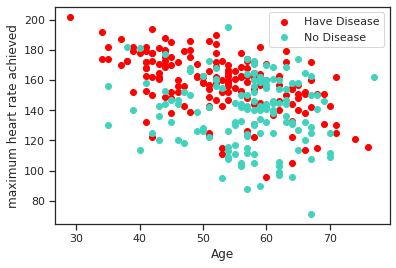

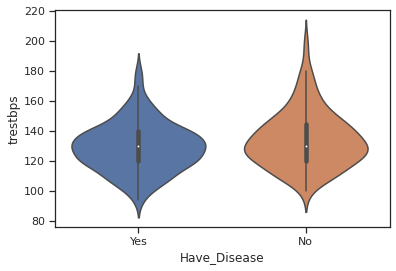

In [63]:
# scatter
plt.scatter(x=df1.age[df1.Have_Disease=='Yes'], y=df1.thalach[(df1.Have_Disease=='Yes')], c="red")
plt.scatter(x=df1.age[df1.Have_Disease=='No'], y=df1.thalach[(df1.Have_Disease=='No')], c='#41D3BD')
plt.legend(["Have Disease", "No Disease"])
plt.xlabel("Age")
plt.ylabel("maximum heart rate achieved")
plt.show()
sns.violinplot(x=df1.Have_Disease,y=df1.trestbps,data=df1)
plt.show()

### The relationship between disease and maximum chest pain type

Text(0.5, 1.0, 'chest pain type')

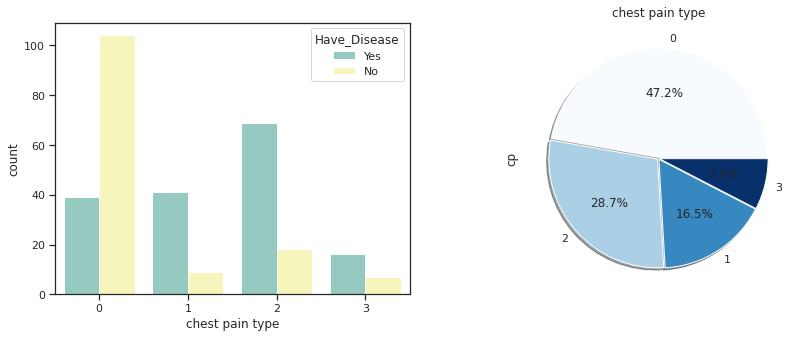

In [66]:
fig,ax=plt.subplots(1,2,figsize=(14,5))
sns.countplot(x='cp',data=df1,hue='Have_Disease',palette='Set3',ax=ax[0])
ax[0].set_xlabel("chest pain type")
df1.cp.value_counts().plot.pie(ax=ax[1],autopct='%1.1f%%',explode=[0.01,0.01,0.01,0.01],shadow=True, cmap='Blues')
ax[1].set_title("chest pain type")

### The relationship between age and chol

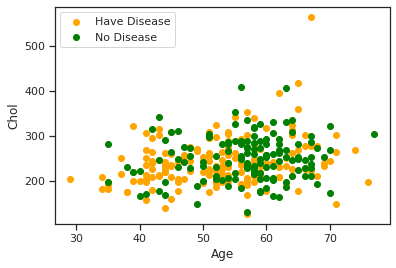

<AxesSubplot:xlabel='Have_Disease', ylabel='chol'>

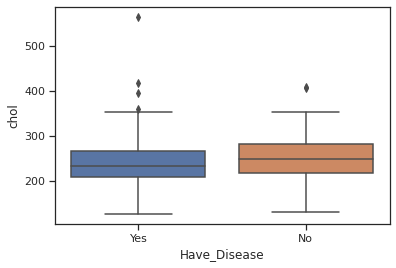

In [70]:
plt.scatter(x=df1.age[df1.Have_Disease=='Yes'], y=df1.chol[df1.Have_Disease=='Yes'], c="orange")
plt.scatter(x=df1.age[df1.Have_Disease=='No'], y=df1.chol[df1.Have_Disease=='No'], c="green")
plt.legend(["Have Disease",'No Disease'])
plt.xlabel("Age")
plt.ylabel("Chol")
plt.show()
# 箱型图
sns.boxplot(x=df1.Have_Disease,y=df1.chol,data=df1)

### correlation analysis 

(13.5, -0.5)

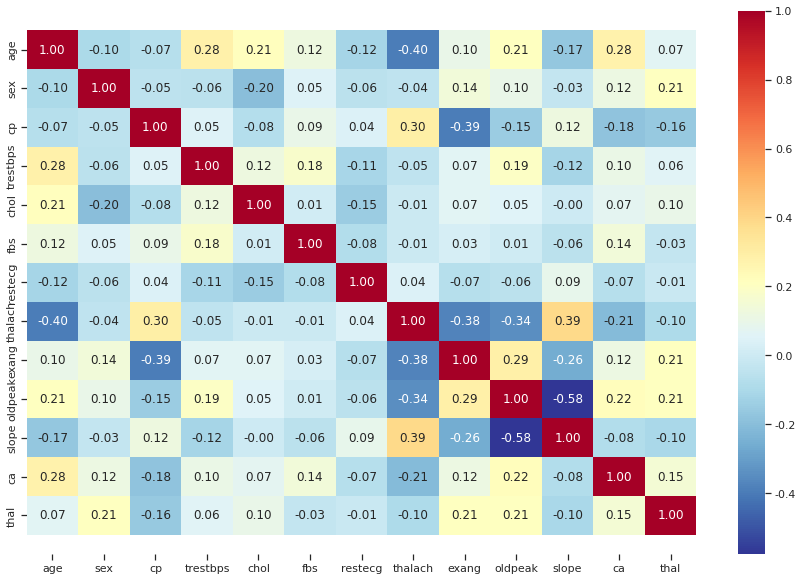

In [64]:
plt.figure(figsize=(15,10))
ax= sns.heatmap(df1.corr(),cmap=plt.cm.RdYlBu_r , annot=True ,fmt='.2f')
a,b =ax.get_ylim()
ax.set_ylim(a+0.5,b-0.5)

# supervised learning task

## prepare the data

In [90]:
import scikitplot as skplt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [76]:
dummy1 = pd.get_dummies(df.cp)
dummy2 = pd.get_dummies(df.thal)
dummy3 = pd.get_dummies(df.restecg)
dummy4 = pd.get_dummies(df.slope)
dummy5 = pd.get_dummies(df.ca)
tmp = pd.concat([df,dummy1,dummy2,dummy3,dummy4,dummy5],axis = 'columns')
final = tmp.drop(['cp','thal','restecg','slope','ca'],axis = 1)

In [94]:
x = final.drop(['target'], axis = 1)
y = final['target']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.25, random_state = 77, shuffle = True)

In [95]:
feature_scaler = MinMaxScaler()
x_train = feature_scaler.fit_transform(x_train)
x_test = feature_scaler.transform(x_test)

## Logistic Regression

In [101]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [143]:
LogReg = LogisticRegression(random_state=7)
parameters = {'C': [0.1 ,2.0, 5.0, 10.0, 15.0, 20.0]}
log_regressor = GridSearchCV(LogReg, parameters, scoring='neg_mean_squared_error' ,cv =5)
log_regressor.fit(x_train, y_train)
log_regressor.best_params_

{'C': 0.1}

In [144]:
model1 = LogisticRegression(C=0.1, random_state=7)
model1.fit(x_train,y_train)
accuracy = model1.score(x_test,y_test)
print(f'Logistic Regression Accuracy: {accuracy*100}')

Logistic Regression Accuracy: 89.47368421052632


<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

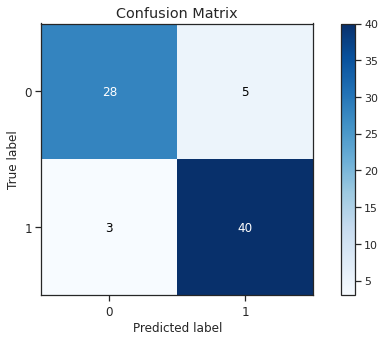

In [145]:
pred1 = model1.predict(x_test)
matrix1 = (y_test,pred1)
skplt.metrics.plot_confusion_matrix(y_test, pred1,figsize=(10,5))

### This shows there were problem in only 8 values, otherwise all the values were predicted right.

## Decision Trees

In [122]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

In [146]:
Tree = DecisionTreeClassifier(max_depth=7, random_state=7)
parameters = {'criterion': ['gini','entropy']}
tree_classifier = GridSearchCV(Tree, parameters, scoring='neg_mean_squared_error' ,cv =5)
tree_classifier.fit(x_train, y_train)
tree_classifier.best_params_

{'criterion': 'entropy'}

In [147]:
model2 = DecisionTreeClassifier(criterion = 'entropy', max_depth=7)
model2.fit(x_train , y_train)
accuracy = model2.score(x_test,y_test)
print(f'Decision Tree Accuracy: {accuracy*100}')

Decision Tree Accuracy: 75.0


<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

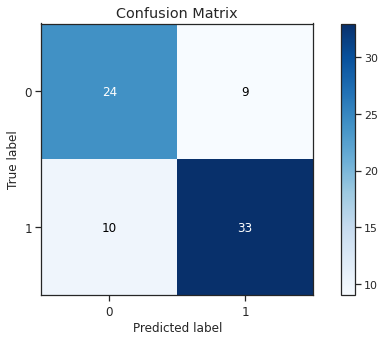

In [148]:
pred2 = model2.predict(x_test)
matrix2 = (y_test,pred2)
skplt.metrics.plot_confusion_matrix(y_test ,pred2 ,figsize=(10,5))

### This shows there were problem in 18 values.

In [141]:

_ax = plt.figure(figsize=[12, 7], dpi=300).add_axes([0,0,1,1])
plot_tree(model2, feature_names = None, class_names=['Have Disease', 'No Disease'], filled = True, ax=_ax, fontsize=20)

[Text(1704.2553191489362, 1968.75, 'X[8] <= 0.5\nentropy = 0.996\nsamples = 227\nvalue = [105, 122]\nclass = No Disease'),
 Text(804.2553191489362, 1706.25, 'X[20] <= 0.5\nentropy = 0.751\nsamples = 121\nvalue = [26, 95]\nclass = No Disease'),
 Text(382.97872340425533, 1443.75, 'X[5] <= 0.718\nentropy = 0.406\nsamples = 74\nvalue = [6, 68]\nclass = No Disease'),
 Text(306.3829787234043, 1181.25, 'X[1] <= 0.5\nentropy = 0.592\nsamples = 42\nvalue = [6, 36]\nclass = No Disease'),
 Text(229.78723404255322, 918.75, 'entropy = 0.0\nsamples = 17\nvalue = [0, 17]\nclass = No Disease'),
 Text(382.97872340425533, 918.75, 'X[5] <= 0.542\nentropy = 0.795\nsamples = 25\nvalue = [6, 19]\nclass = No Disease'),
 Text(229.78723404255322, 656.25, 'X[3] <= 0.373\nentropy = 0.971\nsamples = 5\nvalue = [3, 2]\nclass = Have Disease'),
 Text(153.19148936170214, 393.75, 'X[0] <= 0.467\nentropy = 0.918\nsamples = 3\nvalue = [1, 2]\nclass = No Disease'),
 Text(76.59574468085107, 131.25, 'entropy = 0.0\nsamples

## Support Vector Machine

In [149]:
from sklearn.svm import SVC

In [152]:
SVM = SVC(random_state=7)
parameters = {'C': [0.01,0.1,1,5,10,15,20], 'kernel':['linear', 'poly', 'rbf', 'sigmoid']}
SVM_classifier = GridSearchCV(SVM, parameters, scoring='neg_mean_squared_error' ,cv =5, n_jobs=-1)
SVM_classifier.fit(x_train, y_train)
SVM_classifier.best_params_

{'C': 1, 'kernel': 'rbf'}

In [153]:
model3 = SVC(C=1, kernel='rbf', random_state=7)
model3.fit(x_train , y_train)
accuracy = model3.score(x_test,y_test)
print(f'SVM Classifier Accuracy: {accuracy*100}')

SVM Classifier Accuracy: 86.8421052631579


<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

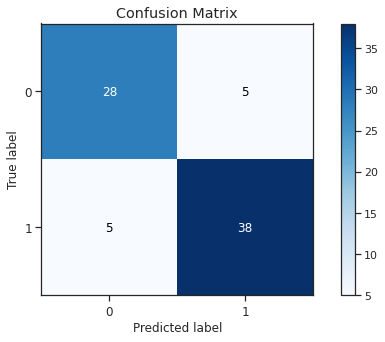

In [154]:
pred3 = model3.predict(x_test)
matrix3 = (y_test,pred3)
skplt.metrics.plot_confusion_matrix(y_test ,pred3 ,figsize=(10,5))

### This shows there were problem in 10 values.

# unsupervised learning task

In [163]:
from sklearn.preprocessing import StandardScaler

In [168]:
x=df.drop(["target"],axis=1)
standard=StandardScaler()
standard.fit(x)
x_scaled=standard.transform(x)

## PCA

In [165]:
from sklearn.decomposition import PCA

In [172]:
pca = PCA(n_components=5,random_state=0)
pca.fit(x_scaled)
x_pca = pca.transform(x_scaled)
pca.explained_variance_ratio_

array([0.21254053, 0.11820708, 0.09406418, 0.09085735, 0.07861281])

In [174]:
print(x_scaled.shape)
print(x_pca.shape)
print(pca.components_)

(303, 13)
(303, 5)
[[ 0.31420252  0.09083783 -0.27460749  0.18392019  0.11737503  0.07363999
  -0.12772792 -0.41649811  0.36126745  0.41963899 -0.37977222  0.27326172
   0.22202375]
 [ 0.40614872 -0.37779171  0.29726609  0.43818675  0.36451402  0.31743328
  -0.22088181  0.07787618 -0.2631179  -0.05225497  0.04837415  0.09414721
  -0.20072042]
 [-0.09407661  0.55484915  0.35697431  0.2038493  -0.40782498  0.48173624
  -0.08919083  0.15825529 -0.1263561   0.1103429  -0.07381839  0.18356934
   0.12501113]
 [-0.0206618  -0.25530873  0.28790041  0.02260103 -0.34340982 -0.06860532
   0.26609555 -0.18412539 -0.11505621  0.32629597 -0.49484894 -0.32801632
  -0.38919138]
 [-0.30715312  0.0507044   0.16317945  0.18813809  0.3200667  -0.23344184
  -0.39366727  0.32328431  0.03453568  0.25057927 -0.24682275 -0.43536515
   0.33195049]]


Text(0, 0.5, 'principal component')

<Figure size 1080x432 with 0 Axes>

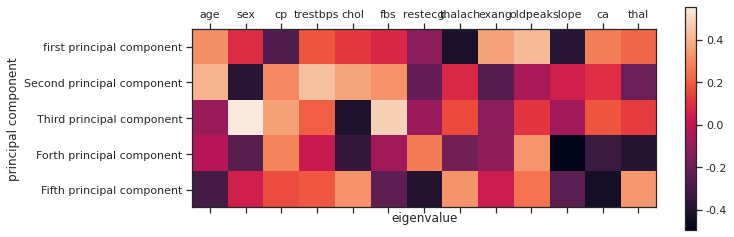

In [179]:
plt.figure(figsize=(15,6))
plt.matshow(pca.components_)
plt.yticks([0,1,2,3,4],["first principal component","Second principal component", "Third principal component", "Forth principal component", "Fifth principal component"])
plt.colorbar()
plt.xticks(range(len(list(x.columns))),x.columns)
plt.xlabel('eigenvalue')
plt.ylabel('principal component')

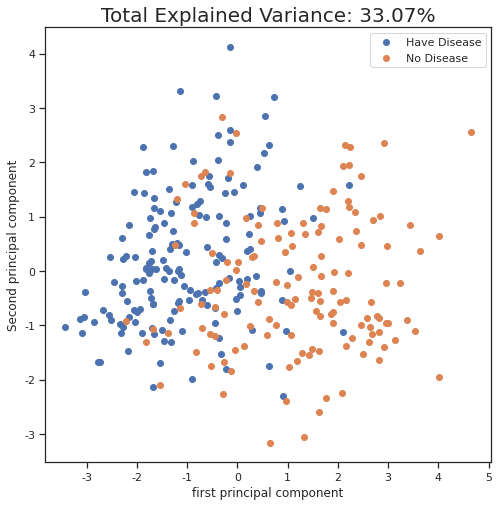

In [181]:
pca2 = PCA(n_components=2)
x_pca = pca2.fit_transform(x_scaled)
tmp=np.c_[x_pca,df["target"]]
plt.figure(figsize=(8,8))
tmp_1=tmp[tmp[:,2]==1]
tmp_0=tmp[tmp[:,2]==0]
plt.scatter(tmp_1[:,0],tmp_1[:,1], label='Have Disease')
plt.scatter(tmp_0[:,0],tmp_0[:,1], label='No Disease')
plt.legend()
plt.title(f'Total Explained Variance: {pca2.explained_variance_ratio_.sum() * 100:.2f}%', fontsize = 20)
plt.xlabel('first principal component')
plt.ylabel('Second principal component')
plt.show()

Text(0, 0.5, 'principal component')

<Figure size 1080x432 with 0 Axes>

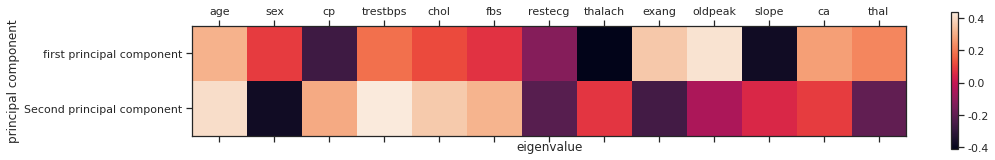

In [182]:
plt.figure(figsize=(15,6))
plt.matshow(pca2.components_)
plt.yticks([0,1],["first principal component","Second principal component"])
plt.colorbar()
plt.xticks(range(len(list(x.columns))),x.columns)
plt.xlabel('eigenvalue')
plt.ylabel('principal component')

## cluster

In [185]:
from sklearn import cluster

In [192]:
cl = cluster.KMeans(n_clusters=2, random_state = 77)
x_cl = cl.fit_transform(x_scaled)

In [205]:
cl.cluster_centers_

array([[-0.25079998, -0.09058243,  0.39038661, -0.14780048, -0.06942161,
        -0.02827065,  0.04913102,  0.45992412, -0.46701852, -0.39384385,
         0.35117315, -0.30755504, -0.23606866],
       [ 0.4528333 ,  0.1635516 , -0.70486471,  0.26686198,  0.12534457,
         0.05104422, -0.08870878, -0.83041855,  0.84322788,  0.71110694,
        -0.63406263,  0.55530771,  0.42623508]])

In [214]:
df.target.to_numpy()

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [217]:
np.where(cl.labels_==0, 1, 0)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,

In [218]:
print(np.sum(df['target'].to_numpy() != np.where(cl.labels_==0, 1, 0)))

56


### 56 inputs in the wrong clusters, PCA is better